<p style="font-size:15pt; text-align:center">
    Introduction to Data Science
</p>
<p style="font-size:20pt; text-align:center">
    Single-variable analysis
</p>

In [1]:
import numpy as np
import pandas as pd

# 导入matplotlib的标准方法
`import matplotlib.pyplot as plt`

`%matplotlib inline`  显示内联的图形而不是打开一个新窗口

In [2]:
import matplotlib.pyplot as plt  # standard way of importing matplotlib
%matplotlib inline  
# the second line is a so-called magic to allow jupyter
#showing plots inline instead of opening a new window

# Loading data set and initial data analysis

初始数据分析是探索性数据分析的第一步，每当您着手处理一个新的数据集时，都必须这样做。

目的是进行一致性检查，以确保**测量和数据的质量是足够的**。

详见维基百科:https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis

我们将使用人口学。csv数据。数据集改编自Kaggle。

该数据集包含有关个人的人口统计信息以及他们是否生病或健康。

We will use the ``demographics.csv`` data. Data set adapted from [Kaggle](https://www.kaggle.com/carlolepelaars/toy-dataset/downloads/toy-dataset.zip/1).

This data set contains demographic information about individuals and whether they are ill or healthy.

***
Question: What types of variable are these?
***

## Loading data
**一般而言不用np，用pd。**
### `np.loadtxt`

     · 第一行是表头，不能输入
 
     · 分隔符
 
     · 数据类型
 
 解决方案：

In [3]:
# load data
# datademographic_array = np.loadtxt('files/demographics.csv') # First attempt to load data
datademographic_array = np.loadtxt('files/demographics.csv', skiprows=1, delimiter=',', dtype='int64') # Success!
datademographic_array.dtype

dtype('int64')

### `pd.read_csv`

In [4]:
# load data
datademographic = pd.read_csv('files/demographics.csv') # First attempt to load data

In [5]:
datademographic

,ID,City,Gender,Age,Income,Illness
0,1,1,0,41,40367,0
1,2,1,0,54,45084,0
2,3,1,0,42,52483,0
3,4,1,0,40,40941,0
4,5,1,0,46,50289,0
...,...,...,...,...,...,...
149995,149996,7,0,48,93669,0
149996,149997,7,0,25,96748,0
149997,149998,7,0,26,111885,0
149998,149999,7,0,25,111878,0


How big is the data set?

In [6]:
print(datademographic.shape)
print(datademographic.size) # the number of elements in this object.

(150000, 6)
900000


How many unique values are there per variable?

## 数据透视表

In [7]:
for col in datademographic.columns:
    print (col, "\n", datademographic.loc[:,col].size, "\n", datademographic.loc[:, col].value_counts(), "\n\n\n", sep="")

ID
150000
2049     1
23262    1
56014    1
53967    1
10960    1
        ..
3371     1
13612    1
15661    1
9518     1
2047     1
Name: ID, Length: 150000, dtype: int64



City
150000
2    50307
3    32173
1    19707
4    14219
7    12292
5     8301
6     8120
8     4881
Name: City, dtype: int64



Gender
150000
0    83800
1    66200
Name: Gender, dtype: int64



Age
150000
26    3918
64    3879
41    3862
43    3862
54    3838
29    3805
28    3798
27    3790
63    3784
44    3782
36    3780
59    3775
47    3773
37    3771
33    3769
58    3762
49    3762
42    3760
32    3759
52    3753
31    3749
48    3743
40    3740
61    3737
38    3734
57    3732
30    3731
51    3729
53    3724
34    3710
46    3707
50    3692
55    3687
62    3684
39    3675
45    3670
35    3658
56    3602
60    3582
25    1868
65    1864
Name: Age, dtype: int64



Income
150000
98410     15
94606     13
93808     13
96376     12
96389     12
          ..
39978      1
46127      1
19504      1
148593     1


In [8]:
datademographic_array.shape

(150000, 6)

In [9]:
for col in range(datademographic_array.shape[1]):
    print(col, np.unique(datademographic_array[:,col]).size, np.unique(datademographic_array[:,col]), "\n")

0 150000 [     1      2      3 ... 149998 149999 150000] 

1 8 [1 2 3 4 5 6 7 8] 

2 2 [0 1] 

3 41 [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65] 

4 71762 [        -654          584         2474 ... 415240000000 500820000000
 547770000000] 

5 2 [0 1] 



We observe:

    - The IDs are all unique. How do we see this?
    - There are 8 cities.
    - There are 2 genders.
    - There are 41 age groups (25-65 year olds).
    - There are many different income levels.
    - There are ill and healthy people.

# EDA of categorical variables

How many people are from each city?

In [10]:
datademographic.groupby('City')['ID'].count() # 我写的等价写法

City
1    19707
2    50307
3    32173
4    14219
5     8301
6     8120
7    12292
8     4881
Name: ID, dtype: int64

In [11]:
datademographic.loc[:,"City"].value_counts()

2    50307
3    32173
1    19707
4    14219
7    12292
5     8301
6     8120
8     4881
Name: City, dtype: int64

## `np.unique()`数组去重与计数

In [23]:
np.unique(datademographic_array[:,1], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([19707, 50307, 32173, 14219,  8301,  8120, 12292,  4881],
       dtype=int64))

Easy. But can we make this more visual? Yes: We need to plot. Let's use matplotlib!

# Matplotlib

* [Matplotlib](http://matplotlib.org) is a powerful 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.

One of the key features of matplotlib is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. This makes matplotlib highly suitable for generating figures for scientific publications. 

More information at the Matplotlib web page: http://matplotlib.org/ . There's a [nice gallery](http://matplotlib.org/gallery.html) worth checking out. 


## Use matplotlib's object-oriented interface.

### The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global. The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

The main object hierarchy is this:
<img src="files/figmap.png" width="400px">

`fig = plt.figure()`：初始化图窗，不是图像！

In [24]:
import matplotlib.pyplot as plt  # standard way of importing matplotlib
%matplotlib inline
# the second line is a so-called magic to allow jupyter showing plots inline instead of opening a new window

### `fig = plt.figure( par )` 
`fig` 是一个包含其他对象的对象，例如:

In [25]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

In [36]:
# Let's add an Axes object to our Figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
# type(one_tick)

<ipython-input-36-eeebd227047a>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)


TypeError: 'YTick' object is not callable

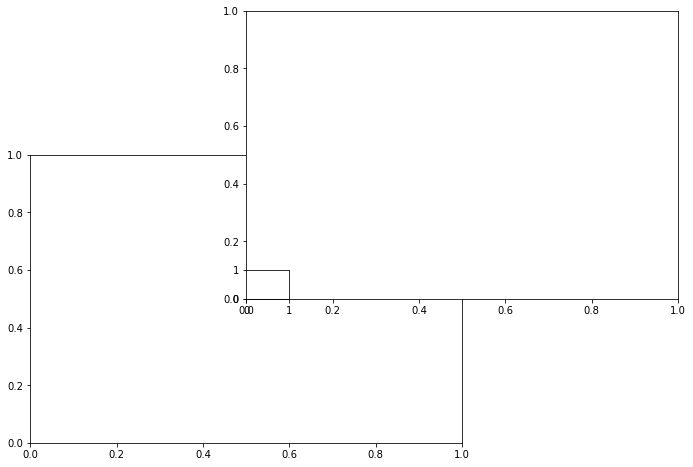

In [34]:
fig

Above, `fig` (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grabbed the first one.

More details here: https://matplotlib.org/examples/showcase/anatomy.html
<img src="files/figanatomy.png" width="600px"/>

### `axes = fig.add_axes([0, 0, 1, 1])`

 - 四个系数分别是：
 
     ·图片左下角的横向位置
     
     ·图片左下角的纵向位置
     
     ·图片宽度
     
     ·图片高度

`在`fig`中加入`axes`

Text(0.5, 1.0, 'Title')

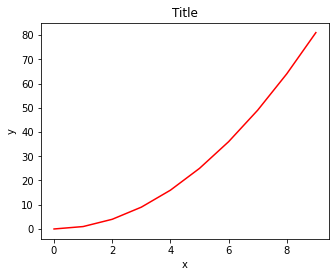

In [38]:
# Minimal plot example:
x = range(0, 10) # x data (will plot on horizontal x axis)
y = [i ** 2 for i in x] # y data (will plot on vertical y axis)
y = np.array(y)

fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r') # plot using color red

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title')

## 按行列添加`fig, axes = plt.subplots(nrows=, ncols=, figsize=)`

`axes`被set为一个数组，可以用`for循环` / `[ ]` 来调用！

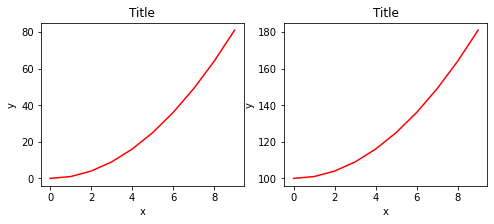

In [39]:
# Minimal example for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3)) # nrows specifies the number of rows you want, ncols how many figures in each row 

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Title')
    y = y + 100 # 这步计算可以做，是因为之前我们set y 为array。

Text(0.5, 1.0, 'This is Axes2 plot!')

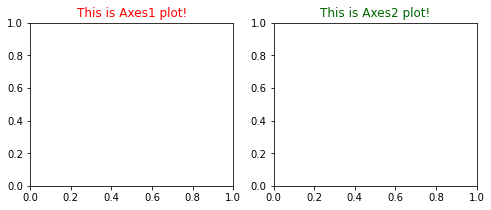

In [40]:
# Minimal example for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3)) # nrows specifies the number of rows you want, ncols how many figures in each row 
axes[0].set_title("This is Axes1 plot!",color = 'r')
axes[1].set_title("This is Axes2 plot!",color = 'darkgreen')

### 在`fig`中添加`axes`:`axes1 = fig.add_axes([0, 0, 0.8, 0.8])`

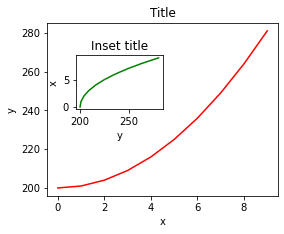

In [41]:
# Minimum example for inset plot
fig = plt.figure(figsize=(4, 3))
axes1 = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.1, 0.4, 0.3, 0.25]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Title')

# inset
axes2.plot(y, x, 'g') # green
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Inset title');

## Saving figures
To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [ ]:
# fig.savefig("filename.pdf", dpi=300)  # dpi is the resolution

Matplotlib可以生成高质量的数字格式输出，包括PNG、JPG、EPS、SVG、PGF和PDF。对于科学论文，我建议尽可能使用PDF格式。(使用pdflatex编译的LaTeX文档可以使用includegraphics命令包含pdf文档)。

# Let's get back to our single-variable exploratory data analysis

A (frequency) **distribution** is a list, table, or graph that displays the frequency of a variable.

## Barplot

Distribution of cities

In [43]:
categories, counts = np.unique(datademographic_array[:,1], return_counts=True)
freq = list(zip(categories, counts))
freq # 这个漂亮！

[(1, 19707),
 (2, 50307),
 (3, 32173),
 (4, 14219),
 (5, 8301),
 (6, 8120),
 (7, 12292),
 (8, 4881)]

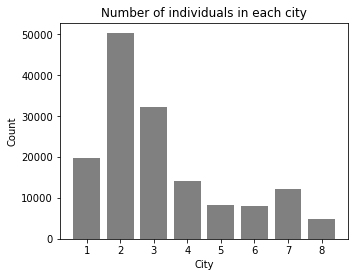

In [47]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray") # fc is the face color

axes.set_xlabel('City')
axes.set_ylabel('Count')
axes.set_title('Number of individuals in each city');

看不懂

<AxesSubplot:>

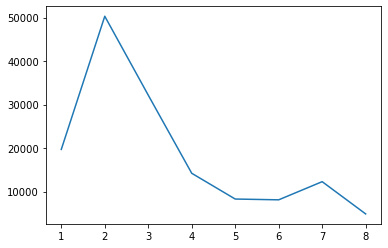

In [65]:
datademographic.loc[:,"City"].value_counts(sort=False).plot(kind = 'line')

### Distribution of gender

In [66]:
categories, counts = np.unique(datademographic_array[:,2], return_counts=True)

In [109]:
categories, counts

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([19707, 50307, 32173, 14219,  8301,  8120, 12292,  4881],
       dtype=int64))

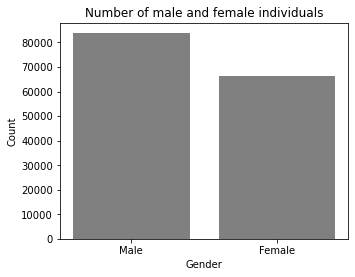

In [72]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray",) # fc is the face color

axes.set_xlabel('Gender')
axes.set_ylabel('Count')
axes.set_title('Number of male and female individuals')

axes.set_xticks(categories)
axes.set_xticklabels(("Male", "Female"));  # 0 is male, 1 is female

### Distribution of age groups

In [73]:
categories, counts = np.unique(datademographic_array[:,3], return_counts=True)

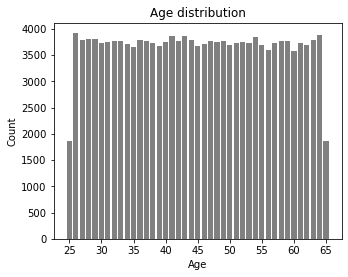

In [74]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray") # fc is the face color

axes.set_xlabel('Age')
axes.set_ylabel('Count')
axes.set_title('Age distribution');

### Distribution of illness

In [77]:
categories, counts = np.unique(datademographic_array[:,5], return_counts=True)

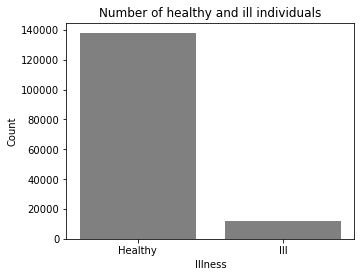

In [78]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray") # fc is the face color

axes.set_xlabel('Illness')
axes.set_ylabel('Count')
axes.set_title('Number of healthy and ill individuals')

axes.set_xticks(categories)
axes.set_xticklabels(("Healthy", "Ill"));  # 0 is healthy, 1 is ill

## Pie chart

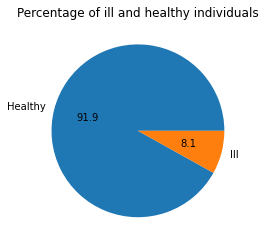

In [82]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.pie(counts, labels=("Healthy", "Ill"), autopct="%.1f")
# autopct displays percentage values using the given format string
# More information about string formatting: 
# https://docs.python.org/3/library/stdtypes.html#old-string-formatting

axes.set_title('Percentage of ill and healthy individuals');

<AxesSubplot:ylabel='Illness'>

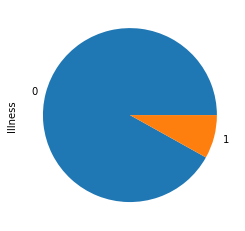

In [83]:
datademographic.loc[:,"Illness"].value_counts(sort=False).plot(kind="pie")

使用饼状图时要小心!

许多数据可视化专家都不鼓励使用它们。如果你有4个以上的类别就可以了，但绝对不建议超过4个类别，比如:

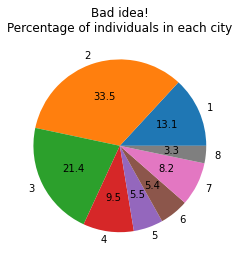

In [84]:
categories, counts = np.unique(datademographic_array[:,1], return_counts=True)
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.pie(counts, labels=(categories), autopct="%.1f") 
# autopct displays percentage values using the given format string

axes.set_title('Bad idea!\nPercentage of individuals in each city');

## Distributions of cities, but percentages

当我们切换到饼图时，我们从计数(或频率)切换到百分比值(或相对值)。

我们也可以用条形图表示百分比。

In [85]:
categories, counts = np.unique(datademographic_array[:,1], return_counts=True)

In [86]:
type(counts)

numpy.ndarray

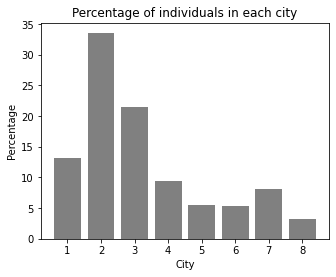

In [87]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, 100*counts/sum(counts), fc="gray") # fc is the face color
# counts 是 ndarray.

axes.set_xlabel('City')
axes.set_ylabel('Percentage')
axes.set_title('Percentage of individuals in each city');

如何对数据帧做同样的事情?

In [88]:
datademographic.head(2)

,ID,City,Gender,Age,Income,Illness
0,1,1,0,41,40367,0
1,2,1,0,54,45084,0


# Exploratory data analysis of quantiative variables

We have not yet explored the quantitative variable of income. Do do so, we plot a histogram of the distribution.

A **histogram** is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous or discrete variable (quantitative variable). To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

<img src="files/histogram.png" width="600px"/>

**Histograms look like bar charts, but they are not the same.** The horizontal axis on a histogram is continuous, whereas bar charts can have space in between categories.

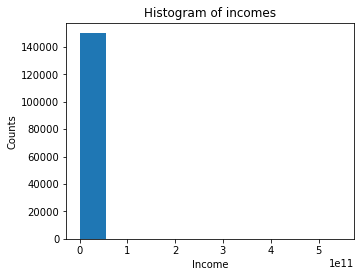

In [89]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(datademographic_array[:,4]);

axes.set_xlabel('Income')
axes.set_ylabel('Counts')
axes.set_title('Histogram of incomes');

***
What is going on?
***

# Descriptive statistics

Let us look at minimum, maximum, and mean.

In [90]:
incomemin = datademographic_array[:,4].min()
incomemax = datademographic_array[:,4].max()
incomemean = round(datademographic_array[:,4].mean())
(incomemin, incomemean, incomemax)

(-654, 9850118, 547770000000)

In [110]:
datademographic.loc[:,"Income"].describe()

count    1.500000e+05
mean     9.850118e+06
std      2.195886e+09
min     -6.540000e+02
25%      8.086875e+04
50%      9.365500e+04
75%      1.045192e+05
max      5.477700e+11
Name: Income, dtype: float64

<img src="files/mean01.png" width="600px"/>

The mean is not robust to outliers.
<img src="files/mean02.png" width="600px"/>
Source: https://mathwithbaddrawings.com/2016/07/13/why-not-to-trust-statistics/

Let us calculate the quartiles. They are more robust to outliers.

<img src="files/quartiles.png" width="600px"/>

The first, or lower, quartile Q1 splits off the lowest 25% of data from the highest 75%.<br />
The second quartile, or median, Q2 cuts the data set in half.<br />
The third, or higher, quartile Q3 splits off the highest 25% of data from the lowest 75%.

In [95]:
quartiles = np.percentile(datademographic_array[:,4], [25, 50, 75])
quartiles

array([ 80868.75,  93655.  , 104519.25])

In [96]:
fivenumbersummary = [incomemin, quartiles[0], quartiles[1], quartiles[2], incomemax]
fivenumbersummary

[-654, 80868.75, 93655.0, 104519.25, 547770000000]

The five number summary (min, Q1, Q2, Q3, max) is visualized with the box plot.

<img src="files/boxplot.png" width="300px"/>

This is a standardized way of displaying the distribution of data based on the five number summary. In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). In matplotlib, by default, whiskers span 1.5 IQR.


The whisker length in box plots:

<img src="files/boxlength.png" width="800px"/>

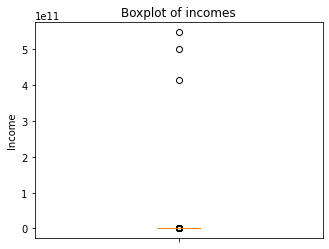

In [97]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot(datademographic_array[:,4]);

axes.set_ylabel('Income')
axes.set_xticklabels('')
axes.set_title('Boxplot of incomes');

Looks like we have some serious outliers.

*Back to presentation* (outliers)

## Outlier detection and data cleaning 

Looks like we have three extreme outliers. Let's investigate and clean the data if needed.

In [111]:
mask = (datademographic_array[:,4] < 10 ** 11) 
print(np.count_nonzero(mask))
print(np.where(mask == False))

149997
(array([ 9, 10, 11], dtype=int64),)


Aha! The bad values are at positions 9,10,11. They are a clear anomaly (global outliers). Let's clean the data and remove them. 

In [112]:
datademographic_cleaned = datademographic_array[mask,:]
datademographic_cleaned.shape # double-check

(149997, 6)

We removed those three extreme values. How does the box plot look like now?

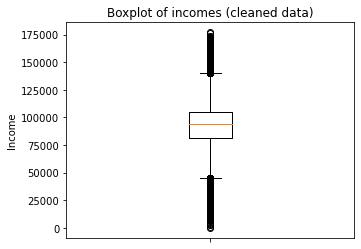

In [113]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot(datademographic_cleaned[:,4]);

axes.set_ylabel('Income')
axes.set_xticklabels('')
axes.set_title('Boxplot of incomes (cleaned data)');

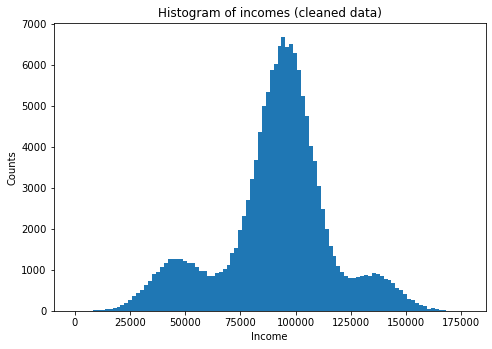

In [114]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(datademographic_cleaned[:,4], 100); # The second argument sets the number of bins.

axes.set_xlabel('Income')
axes.set_ylabel('Counts')
axes.set_title('Histogram of incomes (cleaned data)');

# Exploratory single-variable data analysis with slices

In [125]:
data = np.loadtxt('files/stockholm_temperatures.dat') 

In [129]:
pd.DataFrame(data,columns=['Year','Month','Day','Temperature'])

,Year,Month,Day,Temperature
0,1800.0,1.0,1.0,-6.1
1,1800.0,1.0,2.0,-15.4
2,1800.0,1.0,3.0,-15.0
3,1800.0,1.0,4.0,-19.3
4,1800.0,1.0,5.0,-16.8
...,...,...,...,...
77426,2011.0,12.0,27.0,8.3
77427,2011.0,12.0,28.0,2.6
77428,2011.0,12.0,29.0,4.9
77429,2011.0,12.0,30.0,0.6


The file stockholm_temperatures.dat contains the temperature in Stockholm since 1800 until 2011. The first three columns are respectively year, month and day, and the last column is the temperature.

***
Question: What variable types are these? And what is the first thing we need to do?
***

## Plot the data

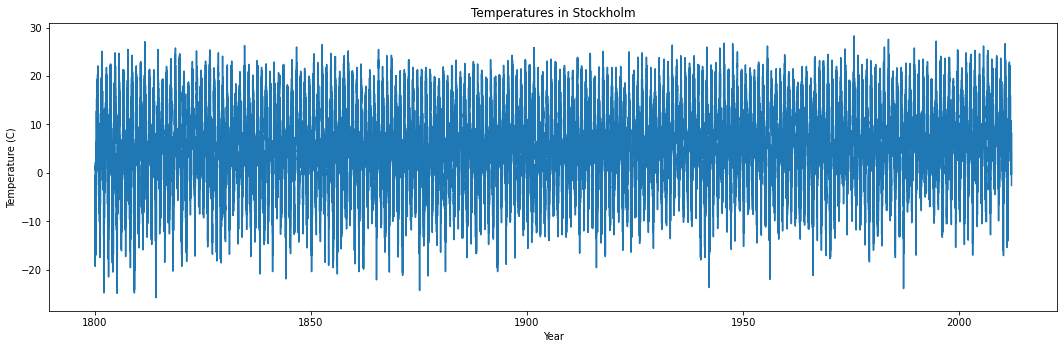

In [116]:
fig = plt.figure(figsize=(14, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

axes.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,3])

axes.set_title('Temperatures in Stockholm')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (C)');

## Get descriptive statistics

In [106]:
quartiles = np.percentile(data[:,3], [25, 50, 75])
quartiles

array([ 0.2,  5.7, 13.2])

In [107]:
fivenumbersummary = [data[:,3].min(), quartiles[0], quartiles[1], quartiles[2], data[:,3].max()]
fivenumbersummary, round(data[:,3].mean())

([-25.8, 0.2, 5.7, 13.2, 28.3], 6)

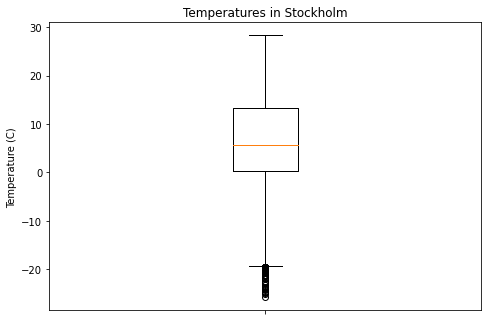

In [108]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot(data[:,3]);

axes.set_title('Temperatures in Stockholm')
axes.set_xticklabels('')
axes.set_ylabel('Temperature (C)');

## Plot distribution

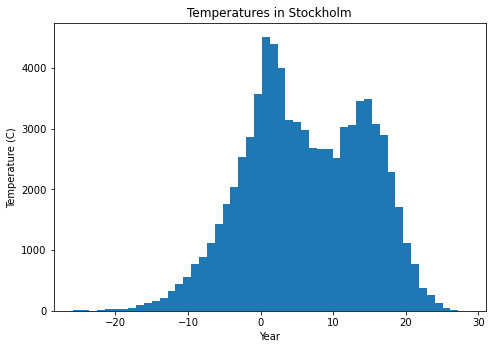

In [117]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(data[:,3], 50);

axes.set_title('Temperatures in Stockholm')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (C)');

## Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, if we want to calculate the average temperature in 1971 only, we can create a mask in the following way:

In [118]:
mask = (data[:,0] == 1971)
data[mask,0]

array([1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971.,

In [119]:
data[mask,3]

array([ -9.2,  -6.5,  -4.7,  -0.3,  -6.8, -11.6,  -1.9,   4.3,   4.6,
         5.9,   4.8,   1.9,   0.8,  -0.9,  -1.5,  -1.5,  -3.9,   2.4,
         1.3,   2. ,   2. ,   1.8,   2.5,   3.7,   4.9,   3.7,   1.7,
        -2.1,  -5.1,  -6.3,   0.2,  -2.7,  -4. ,  -0.6,   1.6,   3.4,
         2.4,  -0.4,  -1.9,  -4.8,  -1.9,   2.5,   2.4,   3.1,   2.5,
         1.7,   1.5,   0.5,   0. ,  -0.3,   0.5,   1.1,   1.1,  -2.1,
         0.6, -11.9,  -8.2,  -8.3,  -7.9,  -7.7,  -8.5, -10.8, -13.5,
        -8.6,  -5.4,  -0.5,   2.1,   0. ,  -4.6,  -3.5,  -3. ,  -0.8,
         0.4,  -0.1,   0.8,   1.6,   1.7,   1.8,   1.3,   0. ,  -2.2,
        -4.4,  -0.3,   3.6,   3.3,  -0.8,  -1.4,   1. ,  -0.5,   0.6,
         4.2,   4. ,   3.6,  -0.7,   0.1,   0.9,   2.5,   5.6,   3.7,
         4.2,   6.1,   5.8,   2.7,   2.3,   3. ,   4.6,   5.2,   6.5,
         9. ,   9.8,   7.6,   3.3,   2.1,   0.5,  -0.3,   0.1,   2.2,
         3.6,   1.2,   3.3,   6.4,   9.9,   8.5,   7.4,   9.4,  12.2,
        14.7,  13.2,

In [120]:
print("This is the mean temperature in Stockholm in 1971: "+str(np.mean(data[mask,3])))

This is the mean temperature in Stockholm in 1971: 6.9301369863013695


If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [130]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [122]:
mask_feb = (data[:,1] == 2)

In [131]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.212109570736596

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

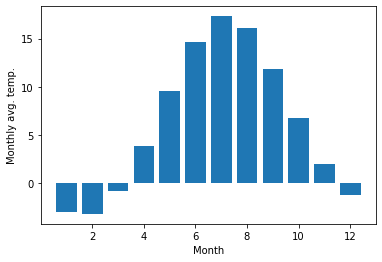

In [133]:
months = np.arange(1,13) # or np.unique(data[:,1])
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months] # 牛b

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

**Source**

This notebook was adapted from:
* [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
* Data 8: The Foundations of Data Science
* Introduction to data science by Michael Szell